# Intermediate Python: Sorting Algorithms

## **Time complexity** 

[Time Complexity](https://www.geeksforgeeks.org/dsa/what-is-logarithmic-time-complexity/) measures how the runtime of an algorithm increases as the input size, *n*, grows. It also helps us compare algorithms’ efficiency independently of hardware or programming language. This allows us to reason about scalability — how well an algorithm will perform as our dataset grows large.

A **step** is a single fundamental operation an algorithm performs, such as:
- Comparing two numbers
- Swapping two elements
- Assigning a value to a variable
- Example: This loops performs n steps
    ```python
    for i in range(n):
        print(i)
    ```

**Key idea**: We care about the growth rate, measured in units of number of steps, not just the time of execution in seconds


<p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20220812122843/Logarithmic-time-complexity-blog-1.jpg" width = "800">
</p>

There are several notations used to describe time complexity:
- [Big O (O)](https://www.geeksforgeeks.org/dsa/analysis-algorithms-big-o-analysis/): Describes the upper bound — the worst-case growth rate of an algorithm.

    <p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20240329121436/big-o-analysis-banner.webp" width = "800">
    </p>

- [Big Omega ($\Omega$)](https://www.geeksforgeeks.org/dsa/analysis-of-algorithms-big-omega-notation/): Describes the lower bound — the best-case growth rate.
    
    <p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20240329113344/Big-omega-notation-banner.webp" width = "800">
    </p>

There are other time complexity metrics but we focus on these two in this lecture.

In addition to time, we also care about **space complexity**, which measures how much memory (RAM) an algorithm uses as the input size grows. Efficient algorithms often balance time vs. space trade-offs.

### Time Complexity of Lists and Dictionaries

To build some intuition, let's consider the time complexity of using lists and dictionaries in Python.

#### **Python Lists:** Lists are ordered sequences of elements.

| Operation                   | Big O    | 
| -------------------------- | -------- |
| Access by index            | O(1)     |
| Search by value            | O(n)     |
| Insert/remove at end       | O(1)     |
| Insert/remove at beginning | O(n)     |

#### **Python Dictionaries:** Dictionaries are hash maps (key-value pairs).
| Operation                   | Big O    |
| -------------------------- | -------- | 
| Lookup by key              | O(1)     |
| Insert/delete by key       | O(1)     |
| Iterating over keys/values | O(n)     |

In [21]:
# a set is a hashmap but there is no key-to-value mapping, it's just a key mapping
name_set = {'Mr. Bean', 'Paul Blart', 'Zoolander', 'Borat', 'Hubert Dubois',} 
name_list = ['Mr. Bean', 'Paul Blart', 'Zoolander', 'Borat', 'Hubert Dubois',]
name_to_find ='Hubert Dubois'

In [22]:
%%time
name_to_find in name_set

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 4.77 μs


True

In [23]:
%%time
name_to_find in name_list

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.05 μs


True

# Common Sorting Algorithms

## <span style="color: blue">Quick Sort</span>


### Definition
Quick Sort is a **divide-and-conquer** sorting algorithm. It works by selecting a **pivot** element, then **partitioning** the list into two sublists — one with elements less than the pivot and another with elements greater than the pivot. These sublists are then sorted **recursively**, and the results are combined to form the sorted list.

---

### Pseudo Code: 

1. Select a pivot element from the list.  
2. Partition the list into two sublists:  
   - Elements **less than** the pivot  
   - Elements **greater than** the pivot  
3. **Recursively** sort the two sublists.  
4. Combine (concatenate) the sorted sublists and the pivot to form the final sorted list.

---

### Worked Example
```python
ex_list = [6, 3, 7, 5, 2]
less_than_pivot5, greater_than_pivot5 = Partition(pivot=5, ex_list)
# less_than_pivot5 = [3, 2], greater_than_pivot5 = [6, 7]

   # MANAGE SUBPROBLEMS: less_than_pivot5, greater_than_pivot5

   # SUBPROBLEM 1
   less_than_pivot2, greater_than_pivot2 = Partition(pivot=2, less_than_pivot5)
   # less_than_pivot2 = [], greater_than_pivot2 = [3]

   merged_less_than_pivot5 = merge(less_than_pivot2, 2, greater_than_pivot2)
   # merged_less_than_pivot5 = [2,3]

   # END SUBPROBLEM 1

   # SUBPROBLEM 2
   less_than_pivot7, greater_than_pivot7 = Partition(pivot=7, greater_than_pivot5)
   # less_than_pivot7 = [6], greater_than_pivot7 = []

   merged_greater_than_pivot5 = merge(less_than_pivot7, 7, greater_than_pivot7)
   # merged_greater_than_pivot5 = [6,7]

   # END SUBPROBLEM 2

merged = merge(merged_less_than_pivot5, 5, merged_greater_than_pivot5)
# merged = [2, 3, 5, 6, 7]
```

### [Animation Link](https://www.hackerearth.com/practice/algorithms/sorting/quick-sort/visualize/)

| Case                | Description                                                    | Time Complexity |
| ------------------- | -------------------------------------------------------------- | --------------- |
| $\Omega$ (Best Case) | Pivot splits list evenly                                       | **O(n $log_2$ n)**  |
| Big-O (Worst Case)   | Pivot is smallest/largest element each time (unbalanced split) | **O($n^2$)**       |


Pros:
- Can be implemented in-place (no need for large extra memory)
- Can be optimized with randomized pivot selection

Cons:
- Choice of pivot heavily affects performance

In [24]:
# O(n^2) space complexity implementation of quick sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr  

    pivot = arr[len(arr) // 2]  
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + middle + quick_sort(right)

numbers = [6, 3, 7, 5, 2]
print(quick_sort(numbers))  

[2, 3, 5, 6, 7]


In [25]:
# O(1) space complexity implementation of quick sort
def quick_sort_in_place(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort_in_place(arr, low, pivot_index - 1)
        quick_sort_in_place(arr, pivot_index + 1, high) 
    return arr
def partition(arr, low, high):
    pivot = arr[high]  
    i = low - 1  
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  
    arr[i + 1], arr[high] = arr[high], arr[i + 1]  
    return i + 1
numbers = [6, 3, 7, 5, 2]
print(quick_sort_in_place(numbers, 0, len(numbers) - 1))

[2, 3, 5, 6, 7]


## <span style="color: yellow">Bubble Sort</span>

### Definition
Bubble Sort is a simple **comparison-based sorting algorithm**. It repeatedly steps through the list, compares adjacent pairs, and **swaps them if they are in the wrong order**. This process continues until the list is fully sorted — like “bubbling” the largest elements to the top.

---

### Pseudo Code: 

1. Compare each pair of adjacent elements.  
2. If the current element is greater than the next element, **swap** them.  
3. Continue this process for all elements in the list.  
4. After each full pass, the largest element is placed at the end.  
5. Repeat steps 1–4 until no swaps are needed (the list is sorted).

---

### Worked Example
```python
[6, 3, 7, 5, 2]
# Pass 1
# Compare and swap adjacent elements where needed
[3, 6, 5, 2, 7] 

# Pass 2
[3, 5, 2, 6, 7]

# Pass 3
[3, 2, 5, 6, 7]

# Pass 4
[2, 3, 5, 6, 7] 
```
### [Animation Link](https://www.hackerearth.com/practice/algorithms/sorting/bubble-sort/visualize/)

| Case             | Description                                 | Time Complexity |
| ---------------- | ------------------------------------------- | --------------- |
| $\Omega$ (Best Case)        | Already sorted (no swaps needed)            | **O(n)**        |
| Big-O (Worst Case)       | Reverse order                               | **O($n^2$)**       |

Pros:
- Works in-place 
- Good for small datasets or nearly sorted lists

Cons:
- Inefficient on large lists (O($n^2$) time complexity)
- Performs unnecessary comparisons once data is nearly sorted

In [26]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  
                swapped = True
        if not swapped:  
            break
    return arr

numbers = [6, 3, 7, 5, 2]
print(bubble_sort(numbers))  


[2, 3, 5, 6, 7]


## <span style="color: green">Selection Sort</span>

### Definition
Selection Sort is a simple **comparison-based sorting algorithm**. It works by repeatedly finding the **smallest (or largest)** element from the unsorted portion of the list and **moving it to its correct position** in the sorted portion. This continues until the entire list is sorted.

---

### Pseudo Code: 

1. Start with the first element as the minimum.  
2. Compare this element with every other element in the unsorted part of the list.  
3. If a smaller element is found, mark it as the new minimum.  
4. After one full pass, **swap** the minimum element with the first unsorted element.  
5. Move the boundary of the sorted portion one step forward.  
6. Repeat until the entire list is sorted.

---

### Worked Example
```python
[6, 3, 7, 5, 2]

# Pass 1: Find the smallest element in [6, 3, 7, 5, 2]
# Minimum = 2: Swap with first element
[2, 3, 7, 5, 6]

# Pass 2: Find smallest in [3, 7, 5, 6]
# Minimum = 3: Already in correct place
[2, 3, 7, 5, 6]

# Pass 3: Find smallest in [7, 5, 6]
# Minimum = 5: Swap with 7
[2, 3, 5, 7, 6]

# Pass 4: Find smallest in [7, 6]
# Minimum = 6: Swap with 7
[2, 3, 5, 6, 7]
```
### [Animation Link](https://www.hackerearth.com/practice/algorithms/sorting/selection-sort/visualize/)

| Case             | Description                             | Time Complexity |
| ---------------- | --------------------------------------- | --------------- |
| $\Omega$ (Best Case)        | Already sorted                          | **O($n^2$)**       |
| Big-O (Worst Case)       | Reverse order                           | **O($n^2$)**       |


Pros:
- Performs well on small datasets
- In-place algorithm (no additional memory required)

Cons:
- Inefficient for large datasets (O($n^2$) comparisons)

In [27]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]  
    return arr

numbers = [6, 3, 7, 5, 2]
print(selection_sort(numbers))  

[2, 3, 5, 6, 7]


## <span style="color: red">Insertion Sort</span>

### Definition
Insertion Sort is a simple **comparison-based sorting algorithm** that builds the final sorted list **one element at a time**. It takes one element from the unsorted portion and **inserts** it into the correct position in the sorted portion.

---

### Pseudo Code: 

1. Start with the second element as the “current” element (the first element is considered sorted).  
2. Compare the current element with elements in the sorted portion (to its left).  
3. Shift all larger elements in the sorted portion one position to the right.  
4. Insert the current element into its correct position.  
5. Repeat until the entire list is sorted.

---

### Worked Example
```python
[6, 3, 7, 5, 2]

# Pass 1: current = 3 ; compare with [6]
# Insert 3 before 6 : 
[3, 6, 7, 5, 2]

# Pass 2: current = 7 ; compare with [3, 6]
# Already larger : 
[3, 6, 7, 5, 2]

# Pass 3: current = 5 ; compare with [3, 6, 7]
# Insert 5 between 3 and 6 : 
[3, 5, 6, 7, 2]

# Pass 4: current = 2 ; compare with [3, 5, 6, 7]
# Insert 2 at beginning : 
[2, 3, 5, 6, 7]
```
### [Animation Link](https://www.hackerearth.com/practice/algorithms/sorting/insertion-sort/visualize/)

| Case             | Description                                 | Time Complexity |
| ---------------- | ------------------------------------------- | --------------- |
| $\Omega$ (Best Case)        | Already sorted (no shifting needed)         | **O(n)**        |
| Big-O (Worst Case)       | Reverse order                               | **O($n^2$)**       |

Pros:
- Efficient for small datasets
- Performs well on nearly sorted data
- Works in-place (minimal extra memory)

Cons:
- Inefficient for large datasets (O($n^2$) time complexity)

In [28]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        current = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > current:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = current 
    return arr

numbers = [6, 3, 7, 5, 2]
print(insertion_sort(numbers))  


[2, 3, 5, 6, 7]


## <span style="color: purple">Merge Sort</span>

### Definition
Merge Sort is a **divide-and-conquer** sorting algorithm. It divides the list into two halves, **recursively sorts** each half, and then **merges** the two sorted halves into a single sorted list. 

---

### Pseudo Code:

1. If the list has one element or is empty, it is already sorted.  
2. Divide the list into two halves.  
3. Recursively apply Merge Sort to each half.  
4. Merge the two sorted halves together into a single sorted list.

---

### Worked Example
```python
[6, 3, 7, 5, 2]

# Step 1: Divide
# [6, 3, 7] and [5, 2]

#   ENTER FIRST SUBPROBLEM: [6, 3, 7]
#   SUBPROBLEM 1.1 Divide [6, 3, 7]
#   [6, 3] and [7]

#   SUBPROBLEM 1.1.1 Divide [6, 3]
#   [6] and [3]

#   SUBPROBLEM 1.1.2 Merge [6] and [3]
#   [3, 6]

#   Step 1.2 Merge [3, 6] and [7]
#   [3, 6, 7]
#   END FIRST SUBPROBLEM

#   ENTER SECOND SUBPROBLEM [5, 2]
#   SUBPROBLEM 2.1 Divide [5, 2]
#   [5] and [2]

#   # SUBPROBLEM 2.2 Merfe [5] and [2]
#   [2, 5]
#   END SECOND SUBPROBLEM 

# Step 2: Merge [3, 6, 7] and [2, 5]
# [2, 3, 5, 6, 7]


# Step 2: Recursively sort each half
# [6, 3, 7] --> [3, 6, 7]
# [5, 2] --> [2, 5]

# Step 3: Merge the two sorted halves
# Compare elements and merge --> [2, 3, 5, 6, 7]
```

### [Animation Link](https://www.hackerearth.com/practice/algorithms/sorting/merge-sort/visualize/)

| Case             | Description                              | Time Complexity |
| ---------------- | ---------------------------------------- | --------------- |
| Best Case        | Balanced splits (always divides evenly)  | **O(n $log_2$ n)**  |
| Average Case     | Typical case (balanced recursion)        | **O(n $log_2$ n)**  |
| Worst Case       | Always balanced (guaranteed performance) | **O(n $log_2$ n)**  |

Pros:
- Consistent performance — always O(n $log_2$ n)
- Performs well for large datasets

Cons:
- Requires additional memory (O(n) space)
- Slower than in-place algorithms for small datasets
- Recursive calls add overhead

In [29]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr  

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left, right):
    merged = []
    i = j = 0

    # Compare elements from both halves and merge
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    # Append any remaining elements
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

numbers = [6, 3, 7, 5, 2]
print(merge_sort(numbers))


[2, 3, 5, 6, 7]


In [30]:
# timing each algorithm on the same input array
import random
import time

random.seed(42)
example_array = [random.randint(1, 1000) for _ in range(1000)]

In [31]:
# time quick_sort
start_time_quick_sort = time.time()
quick_sort(example_array.copy())
end_time_quick_sort = time.time()
print(f"Quick Sort took {end_time_quick_sort - start_time_quick_sort:.6f} seconds")

Quick Sort took 0.000475 seconds


In [32]:
# time bubble_sort
start_time_bubble_sort = time.time()
bubble_sort(example_array.copy()) 
end_time_bubble_sort = time.time()
print(f"Bubble Sort took {end_time_bubble_sort - start_time_bubble_sort:.6f} seconds")

Bubble Sort took 0.016691 seconds


In [33]:
# time selection_sort
start_time_selection_sort = time.time()
selection_sort(example_array.copy())
end_time_selection_sort = time.time()
print(f"Selection Sort took {end_time_selection_sort - start_time_selection_sort:.6f} seconds")

Selection Sort took 0.007327 seconds


In [34]:
# time insertion_sort
start_time_insertion_sort = time.time()
insertion_sort(example_array.copy())
end_time_insertion_sort = time.time()
print(f"Insertion Sort took {end_time_insertion_sort - start_time_insertion_sort:.6f} seconds")

Insertion Sort took 0.006975 seconds


In [35]:
# time merge_sort
start_time_merge_sort = time.time()
merge_sort(example_array.copy())    
end_time_merge_sort = time.time()
print(f"Merge Sort took {end_time_merge_sort - start_time_merge_sort:.6f} seconds")

Merge Sort took 0.003100 seconds


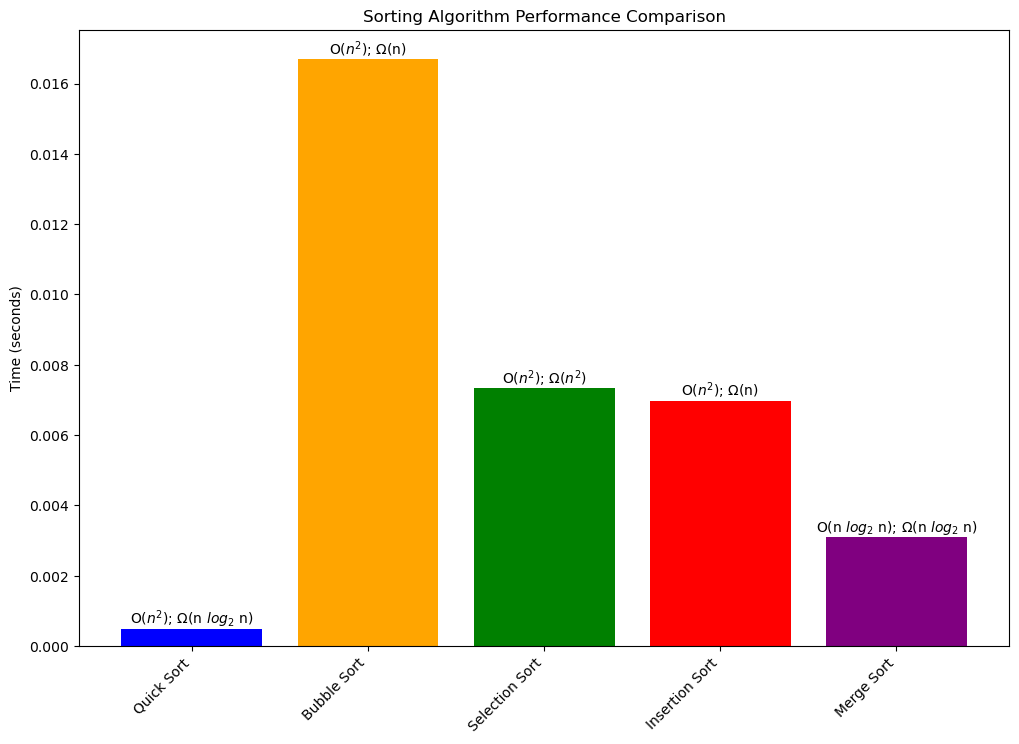

In [36]:
# plot all the times
import matplotlib.pyplot as plt
algorithms = ['Quick Sort', 'Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort']
times = [end_time_quick_sort - start_time_quick_sort,
         end_time_bubble_sort - start_time_bubble_sort,
         end_time_selection_sort - start_time_selection_sort,
         end_time_insertion_sort - start_time_insertion_sort,
         end_time_merge_sort - start_time_merge_sort] 
plt.figure(figsize=(12, 8))
plt.bar(algorithms, times, color=['blue', 'orange', 'green', 'red', 'purple'])
worst_case_times = [r'O($n^2$)', r'O($n^2$)', r'O($n^2$)', r'O($n^2$)', r'O(n $log_2$ n)']
best_case_times = [r'$\Omega$(n $log_2$ n)', r'$\Omega$(n)', r'$\Omega$($n^2$)', r'$\Omega$(n)', r'$\Omega$(n $log_2$ n)']
for i in range(len(algorithms)):
    plt.text(i, times[i], f"{worst_case_times[i]}; {best_case_times[i]}", ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison')
plt.show()

Although the plot illustrates runtime, it shows that algorithms with lower time complexity generally complete tasks faster than those with higher time complexity. 

Also, note that algorithms that share the same $\Omega$ and Big-O bounds do **not** necessarily run at the same speed. This is because these time complexity metrics describe growth rates as the size of the input changes, not the exact number of operations – implementation details effect performance.